In [34]:
#  !pip -q install pycaret[full]

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from pycaret.regression import *
import shap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

.\aribnb-modeling.ipynb
.\catboost_saved_final_best.pkl
.\DataPrep.ipynb
.\final_dataset.csv
.\logs.log
.\.ipynb_checkpoints\aribnb-modeling-checkpoint.ipynb
.\.ipynb_checkpoints\aribnb-modeling-exp-checkpoint.ipynb
.\.ipynb_checkpoints\DataPrep-checkpoint.ipynb
.\.ipynb_checkpoints\DataPrep_offline-checkpoint.ipynb
.\.ipynb_checkpoints\finalize_dataset-checkpoint.ipynb
.\.ipynb_checkpoints\Modeling-checkpoint.ipynb
.\catboost_info\catboost_training.json
.\catboost_info\learn_error.tsv
.\catboost_info\time_left.tsv
.\catboost_info\learn\events.out.tfevents
.\catboost_info\tmp\cat_feature_index.c572773-2b00003f-3b042427-86b0f24f.tmp
.\Data_Prep\Athens_objective_prices.xlsx
.\Data_Prep\Attractions.csv
.\Data_Prep\data_cleaned.csv
.\Data_Prep\listings.csv.gz
.\Data_Prep\Transportation_Metro_Tram.csv
.\EDA_Reports\final_dataset_report.html
.\EDA_Reports\Raw_Data_Profiling_Report.html
.\EDA_Reports\VIF.csv
.\models\catboost_saved_18_MAE_40_RMSE_best.pkl
.\models\gb_saved_23_MAE_123_RMSE.pkl

In [36]:
data_cleaned = pd.read_csv('Data_Prep/data_cleaned.csv', index_col=0)

In [37]:
data_cleaned.shape

(7100, 61)

In [38]:
label = 'price'

In [39]:
setup_1 = setup(data = data_cleaned, target = label, fold_strategy = 'kfold', session_id = 123, use_gpu = True, silent = True, n_jobs=-1)
               #   transform_target = True, transform_target_method = 'yeo-johnson', remove_multicollinearity = True, multicollinearity_threshold = 0.50, ignore_low_variance = True, feature_selection = True, feature_selection_threshold=0.90)

In [40]:

top3 = compare_models(n_select = 3, sort = 'RMSE')
tuned_top3 = [tune_model(i, verbose= False, optimize = 'RMSE') for i in top3]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [41]:
best_model = automl(optimize = 'RMSE')

In [42]:
final_model = finalize_model(best_model)

model_results = pull()

In [43]:
model_results

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     20.2803  1374.4190  37.0732  0.5530  0.3790  0.3344
1     19.8588   983.6405  31.3630  0.5407  0.3998  0.3651
2     24.7021  1841.4002  42.9115  0.5449  0.4352  0.3804
3     20.9093  1164.8505  34.1299  0.5352  0.4167  0.3476
4     21.4200  1738.3250  41.6932  0.5064  0.4200  0.3412
5     21.1399  1264.0254  35.5531  0.4056  0.3988  0.3604
6     20.3624  1488.3804  38.5795  0.5913  0.4085  0.3260
7     23.1955  2632.2492  51.3054  0.3448  0.4335  0.3632
8     21.7711  1444.7677  38.0101  0.5747  0.4556  0.3905
9     20.0724  1486.0335  38.5491  0.5576  0.4197  0.3841
Mean  21.3712  1541.8091  38.9168  0.5154  0.4167  0.3593
SD     1.4503   434.9309   5.2240  0.0746  0.0206  0.0207

In [44]:
mean_results = pd.DataFrame(model_results.iloc[-2])
mean_results

Mean
MAE      21.3712
MSE    1541.8091
RMSE     38.9168
R2        0.5154
RMSLE     0.4167
MAPE      0.3593

In [45]:
sd_results = pd.DataFrame(model_results.iloc[-1])
sd_results

SD
MAE      1.4503
MSE    434.9309
RMSE     5.2240
R2       0.0746
RMSLE    0.0206
MAPE     0.0207

In [46]:
final_model

In [47]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='price')),
                ('fix_perfect', Remove_100(target='price')),
              

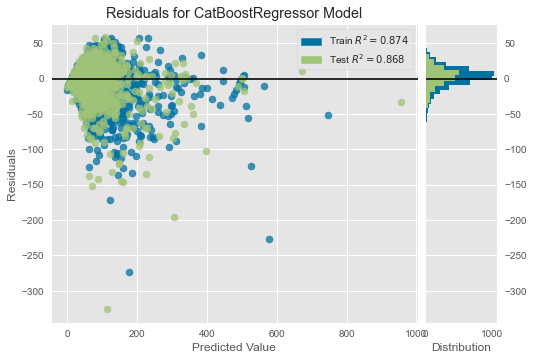

In [48]:
plot_model(final_model, 'residuals')

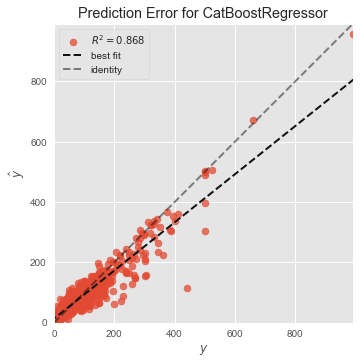

In [49]:
plot_model(final_model, 'error')

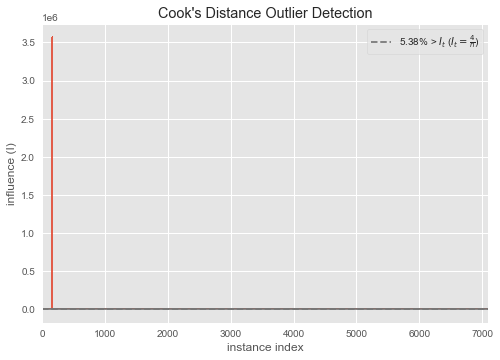

In [50]:
plot_model(final_model, 'cooks')

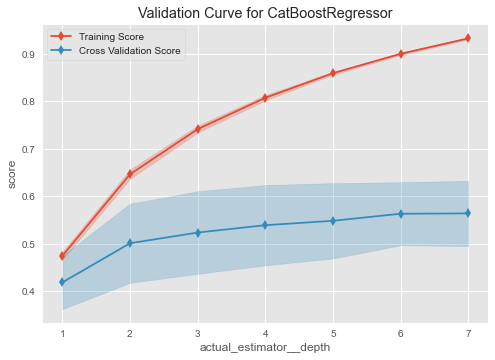

In [51]:
plot_model(final_model, 'vc')

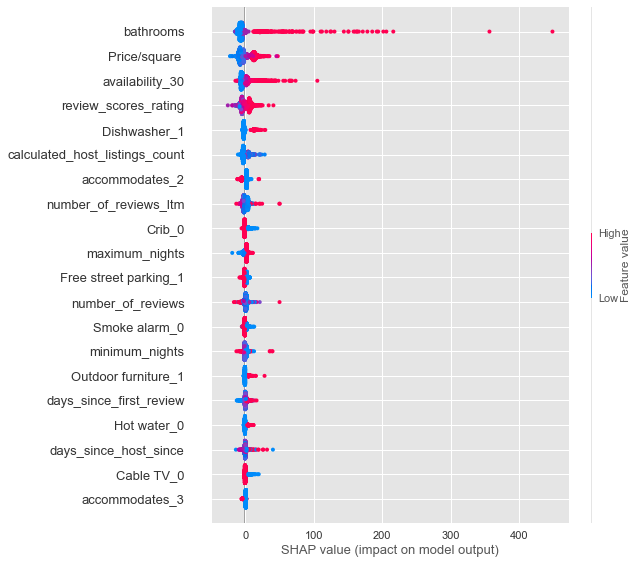

In [52]:
interpret_model(final_model)

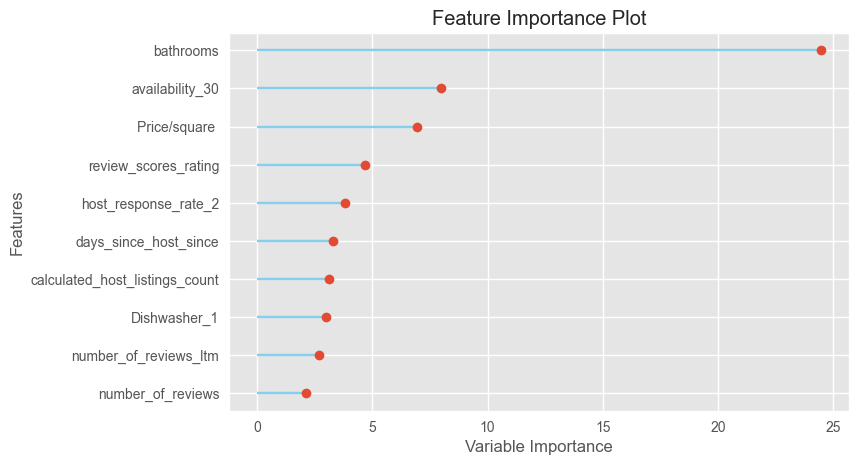

In [53]:
plot_model(final_model, 'feature')

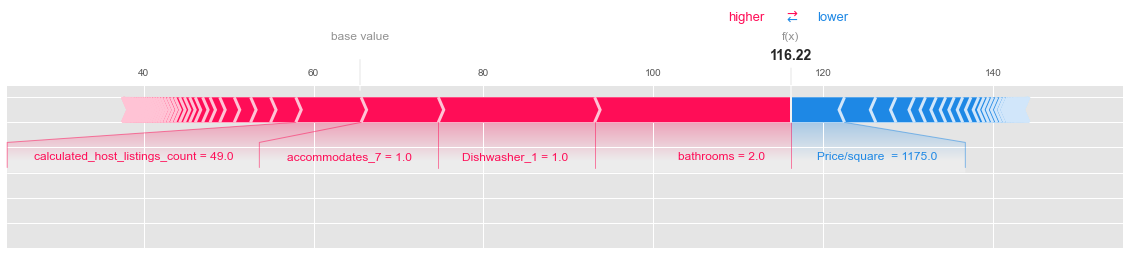

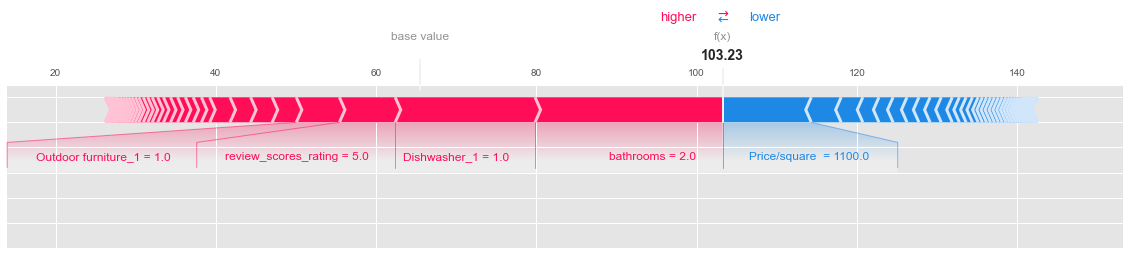

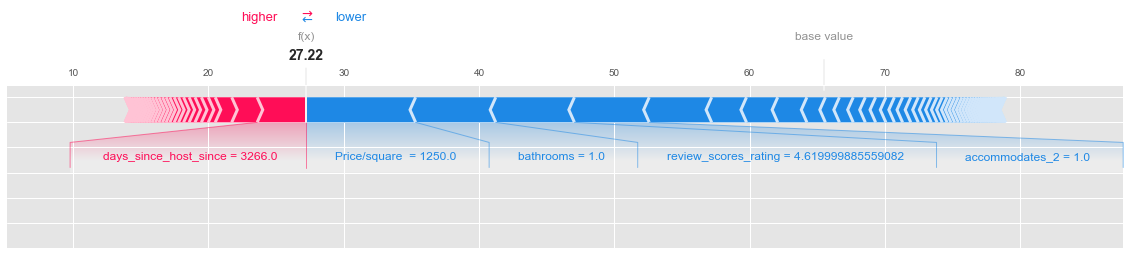

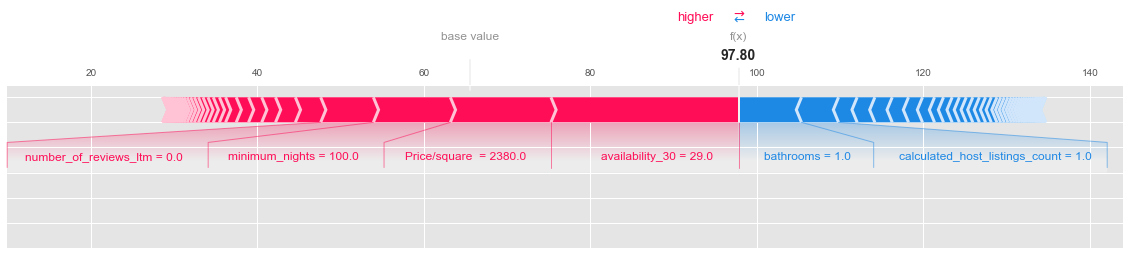

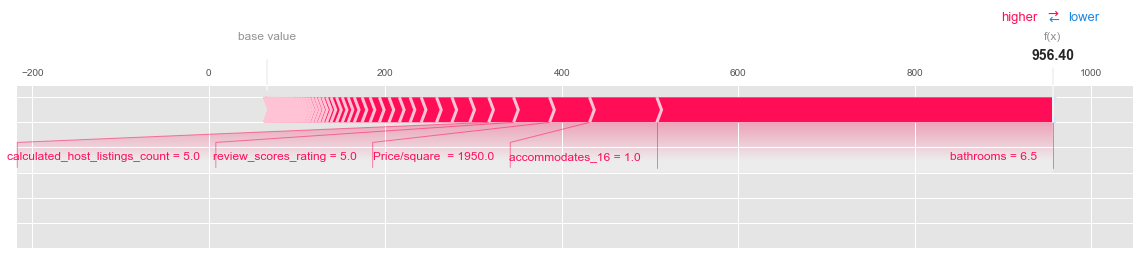

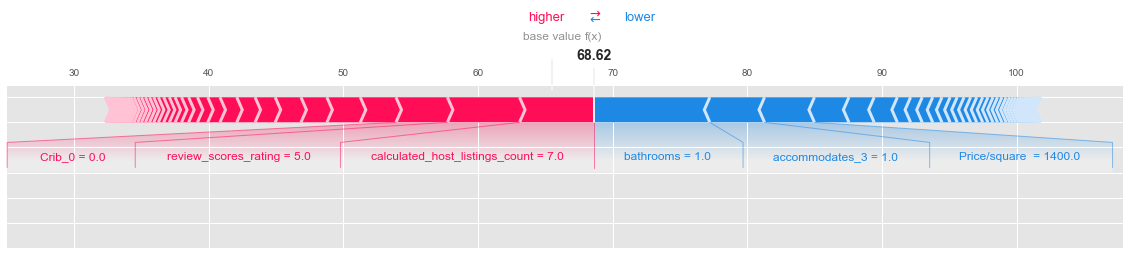

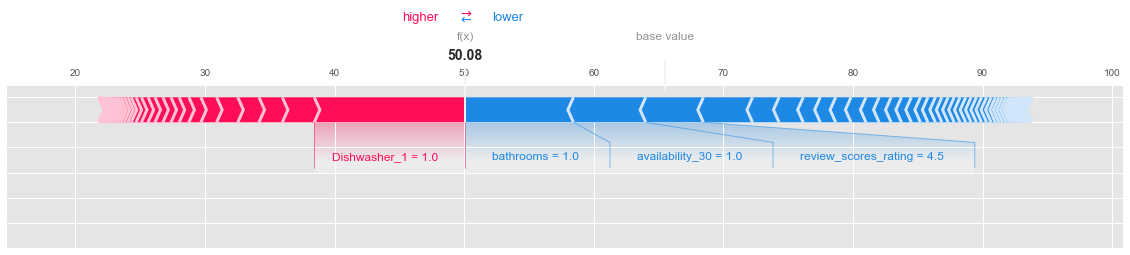

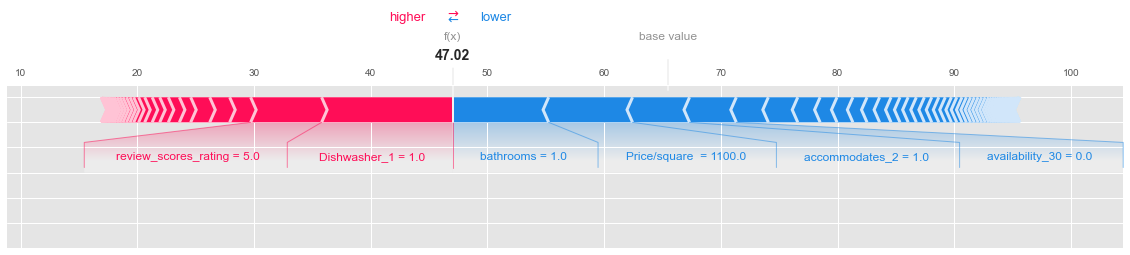

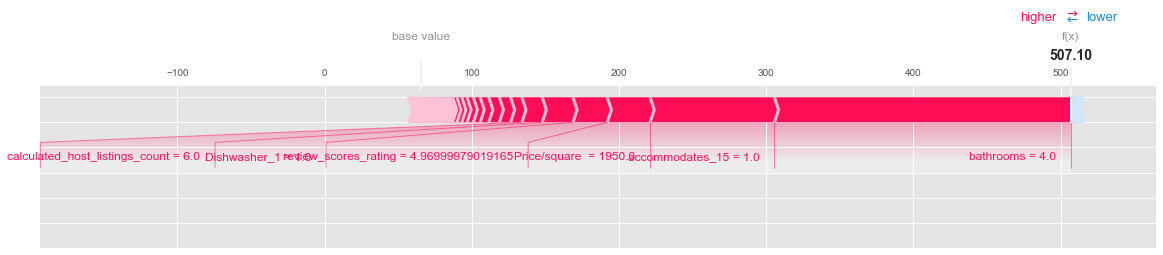

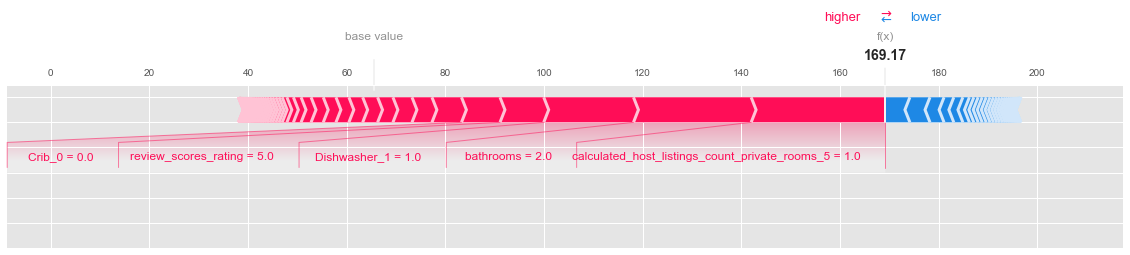

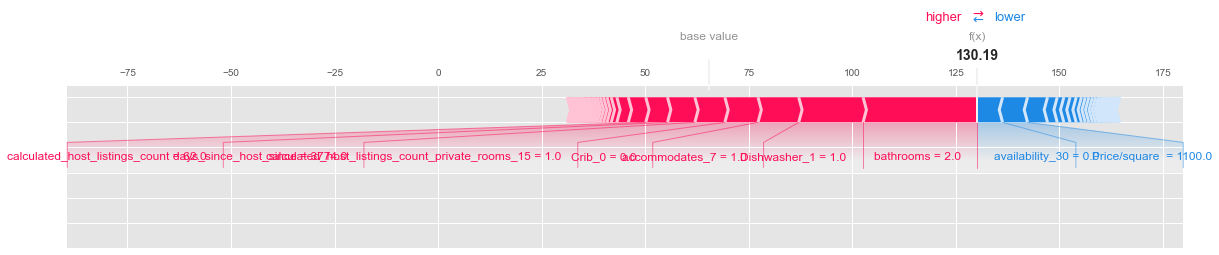

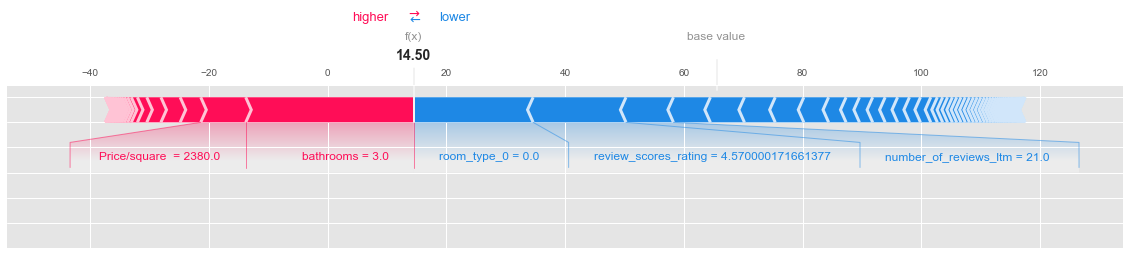

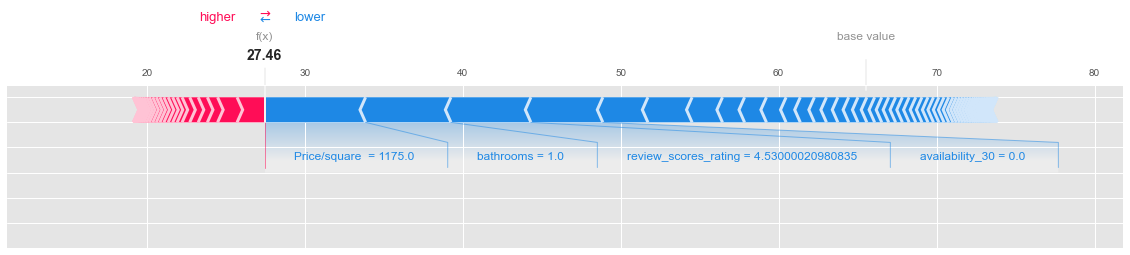

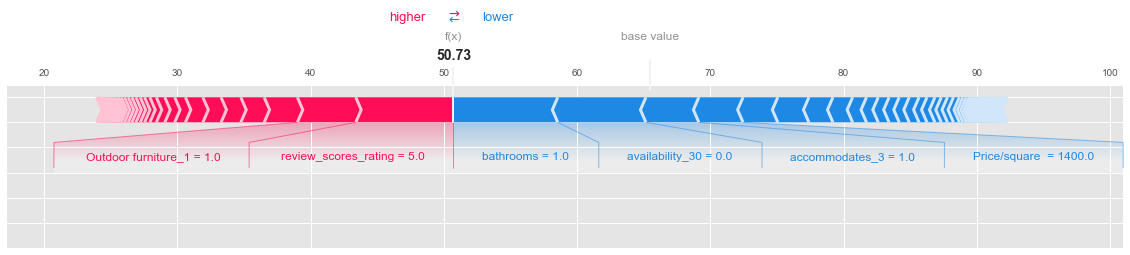

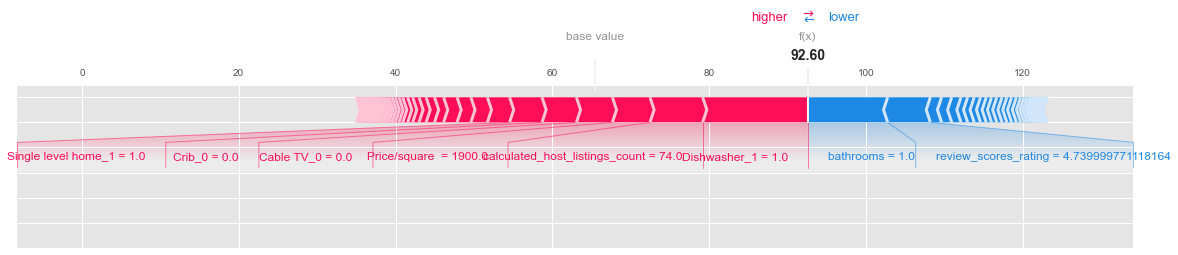

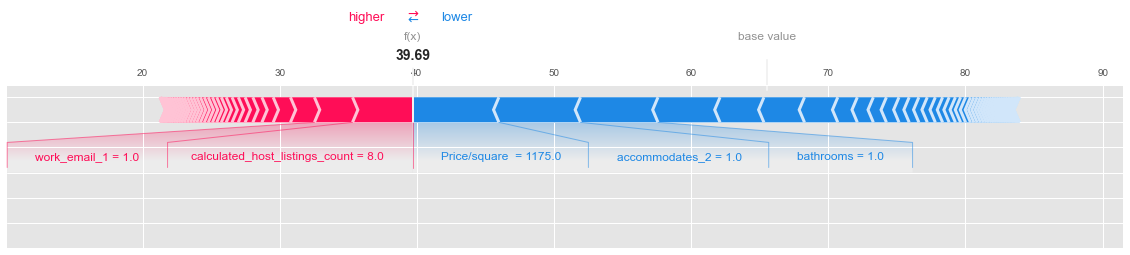

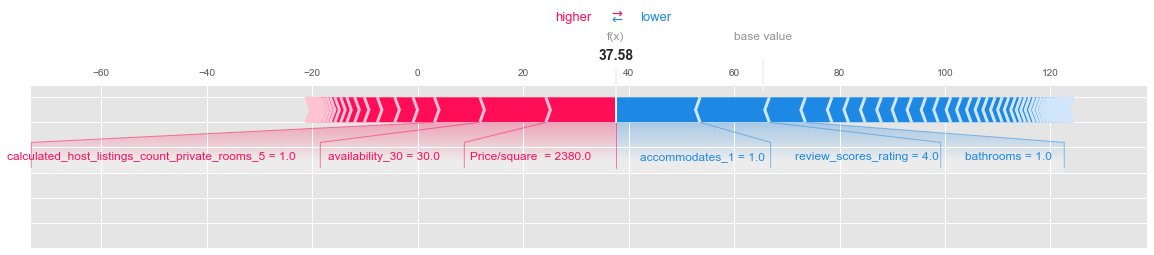

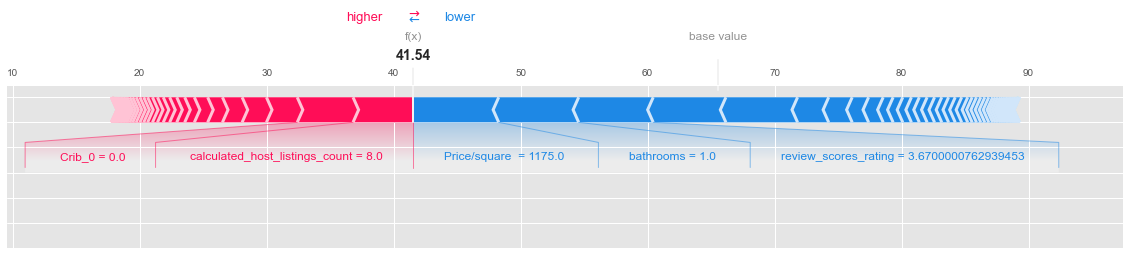

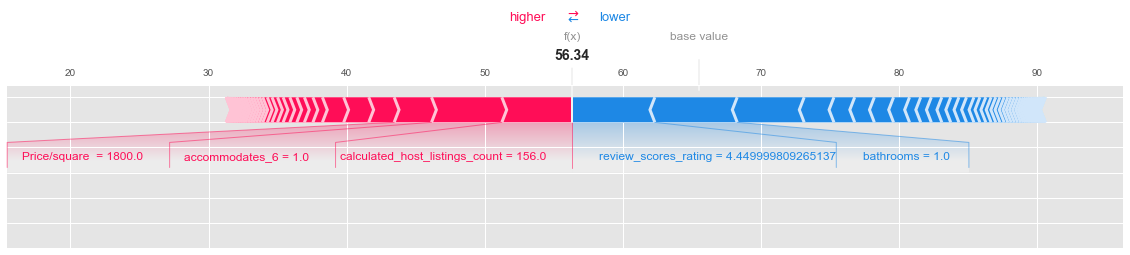

In [54]:
for i in range(100, 2000, 100):
   interpret_model(final_model, plot = 'reason', observation = i,  matplotlib = True, figsize=(20, 3))

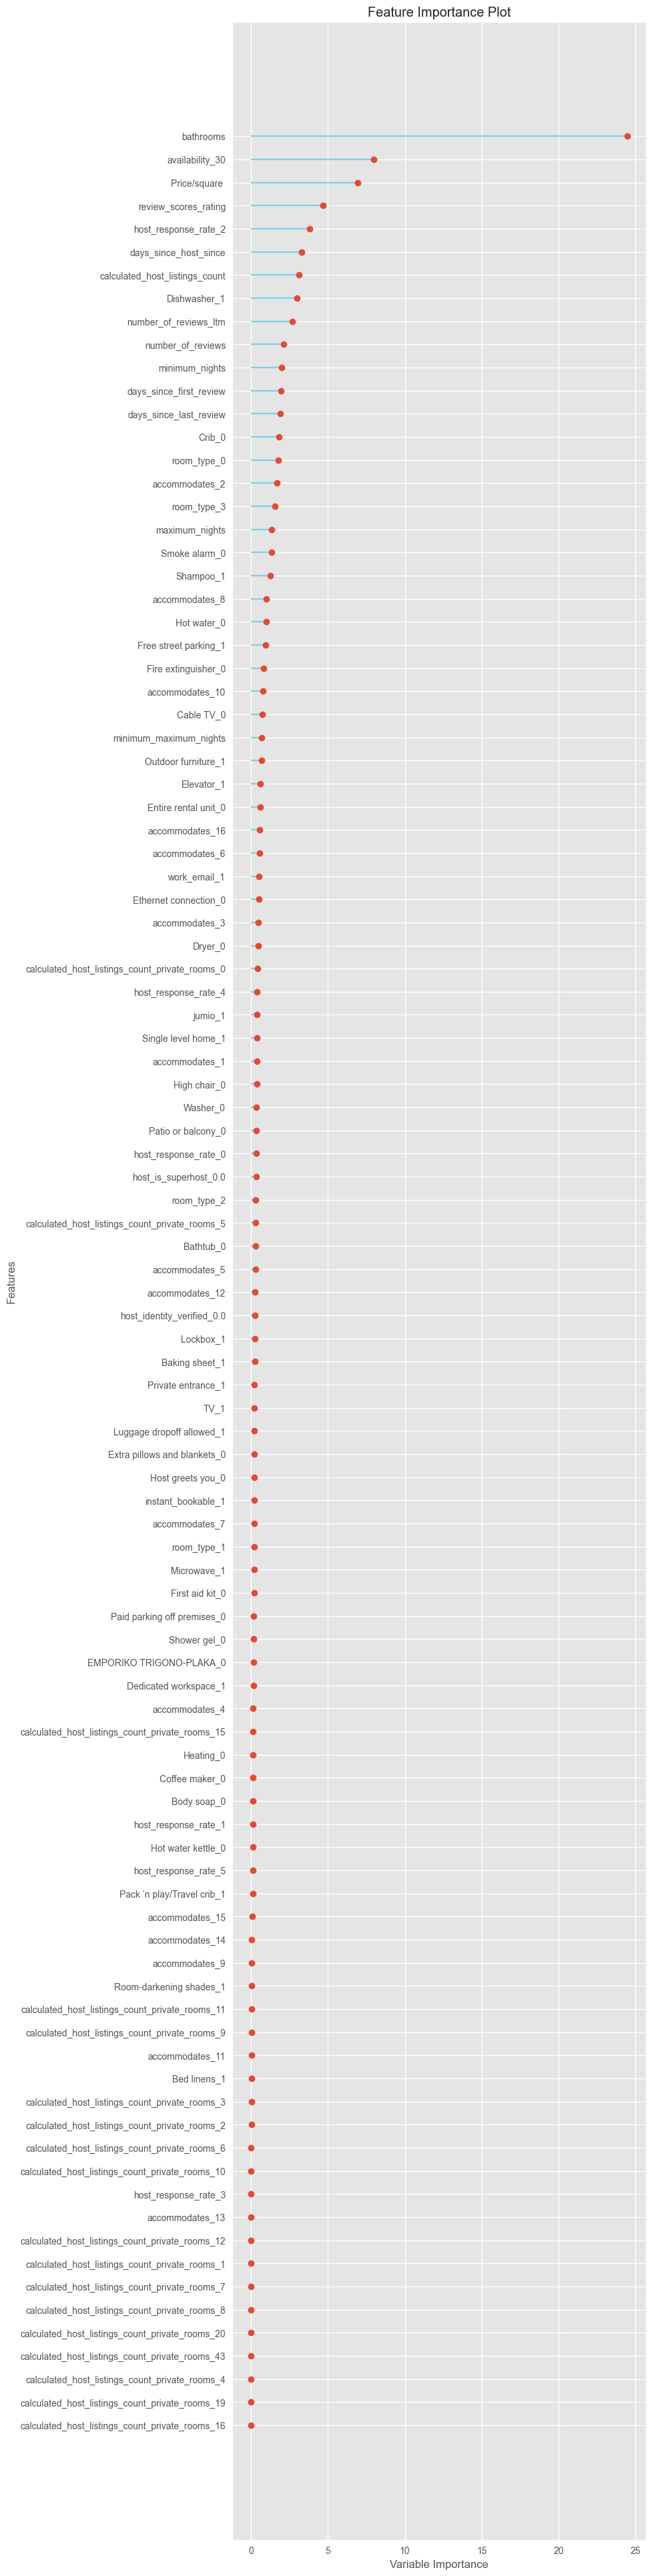

In [55]:
plot_model(final_model, 'feature_all')

In [56]:
save_model(final_model, 'catboost_saved_final_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='price')),
                 ('fix_perfect', Remove_100(target='price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('

In [57]:
get_config('X_train').to_csv('Split_Data/X_Train.csv')
get_config('y_train').to_csv('Split_Data/y_Train.csv')
get_config('X_test').to_csv('Split_Data/X_Test.csv')
get_config('y_test').to_csv('Split_Data/y_Test.csv')
get_config('X').to_csv('Split_Data/X.csv')
get_config('y').to_csv('Split_Data/y.csv')

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data_cleaned, explorative = True, title = "Airbnb Cleaned Dataset Report")
# profile.to_file("EDA_Reports/final_dataset_report.html")